In [15]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [16]:
# Load shapefile
shapefile_path = './gis-map/districts.shp'
gdf = gpd.read_file(shapefile_path)

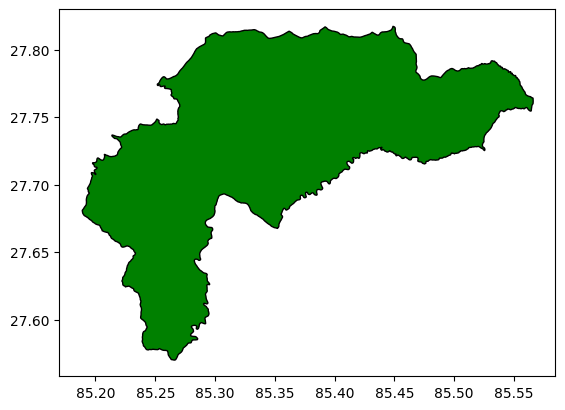

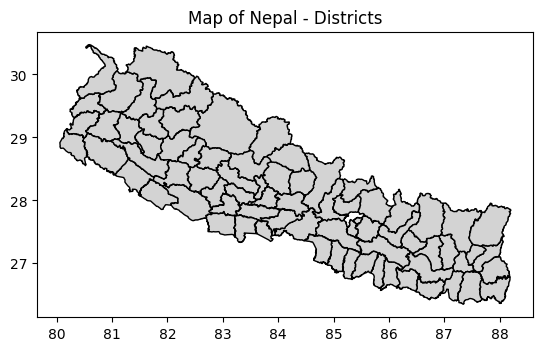

In [17]:
# Set color for Kathmandu
kathmandu_district = 'KATHMANDU'  # Replace with the actual name in your dataset

# Plot the rest of the map
gdf[gdf['DISTRICT'] != kathmandu_district].plot(color='lightgrey', edgecolor='black')
gdf[gdf['DISTRICT'] == kathmandu_district].plot(color='green', edgecolor='black')


plt.title('Map of Nepal - Districts')
plt.show()
